## Importing the necessary libraries for the task

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from skimage.feature import hog
import time

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import data_acquisition as da

Using TensorFlow backend.


# Initial SVM

## Getting the training and testing data

In [2]:
xdat, ydat = da.labels_binary('./dataset')
x = np.array(xdat)
y = np.array(ydat)

# Vectorizing the features
x = np.reshape(x, (3000, (512*512)))
# Normalizing the features
x = x/255.

print(x.shape)

(3000, 262144)


In [3]:
# Splitting the data into a train and validation set
xtrain, xval, ytrain, yval = train_test_split(x, y, train_size=0.85, random_state=15) 

## Implementing SVM algorithm from the scikit library

In [4]:
# Creating an SVM algorithm using scikit learn
svc_classifier1 = SVC(kernel = 'linear')
# Alternatively since we are doing linear SVC, LinearSVC() function could also have been used

# We are fitting our training data onto the classifier while also finding the runtime
start_time = time.time()
svc_classifier1.fit(xtrain, ytrain)
classifier1_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier1_time))

Training time is: 210.65373992919922 seconds


In [5]:
# Predicting the outputs using SVM
y_pred_val1 = svc_classifier1.predict(xval)
y_pred_train1 = svc_classifier1.predict(xtrain)

## Getting accuracy results

The accuracy of the train set: 
1.0
The accuracy of the validation set: 
0.9444444444444444
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.80      0.82      0.81        65
       tumor       0.97      0.97      0.97       385

    accuracy                           0.94       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.94      0.94      0.94       450

The confusion matrix: 


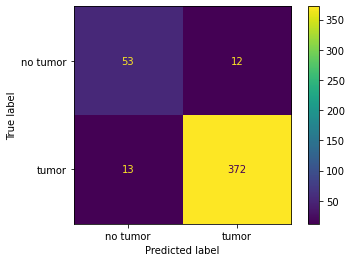

In [6]:
print('The accuracy of the train set: ')
print(accuracy_score(ytrain, y_pred_train1))
print('The accuracy of the validation set: ')
print(accuracy_score(yval, y_pred_val1))

print('The classification report: ')
print(classification_report(yval, y_pred_val1, target_names=['no tumor', 'tumor']))

print('The confusion matrix: ')
conf_mat1 = confusion_matrix(yval, y_pred_val1, labels=svc_classifier1.classes_)
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=['no tumor', 'tumor'])
cm_disp1.plot()

# SVM with HOG

## Implementing Histogram of Oriented Gradients (HOG) for Extracting Features from Image Data

In [7]:
xdat, ydat = da.labels_binary('./dataset')
x = np.array(xdat)
y = np.array(ydat)

print(x.shape)

(3000, 512, 512, 1)


In [8]:
hog_features = []
hog_images = []
for datum in range(x.shape[0]):
    fd, hog_image = hog(x[datum], orientations = 8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True)
    hog_features.append(fd)
    hog_images.append(hog_image)

In [9]:
hog_features = np.array(hog_features)
hog_features.shape

(3000, 8192)

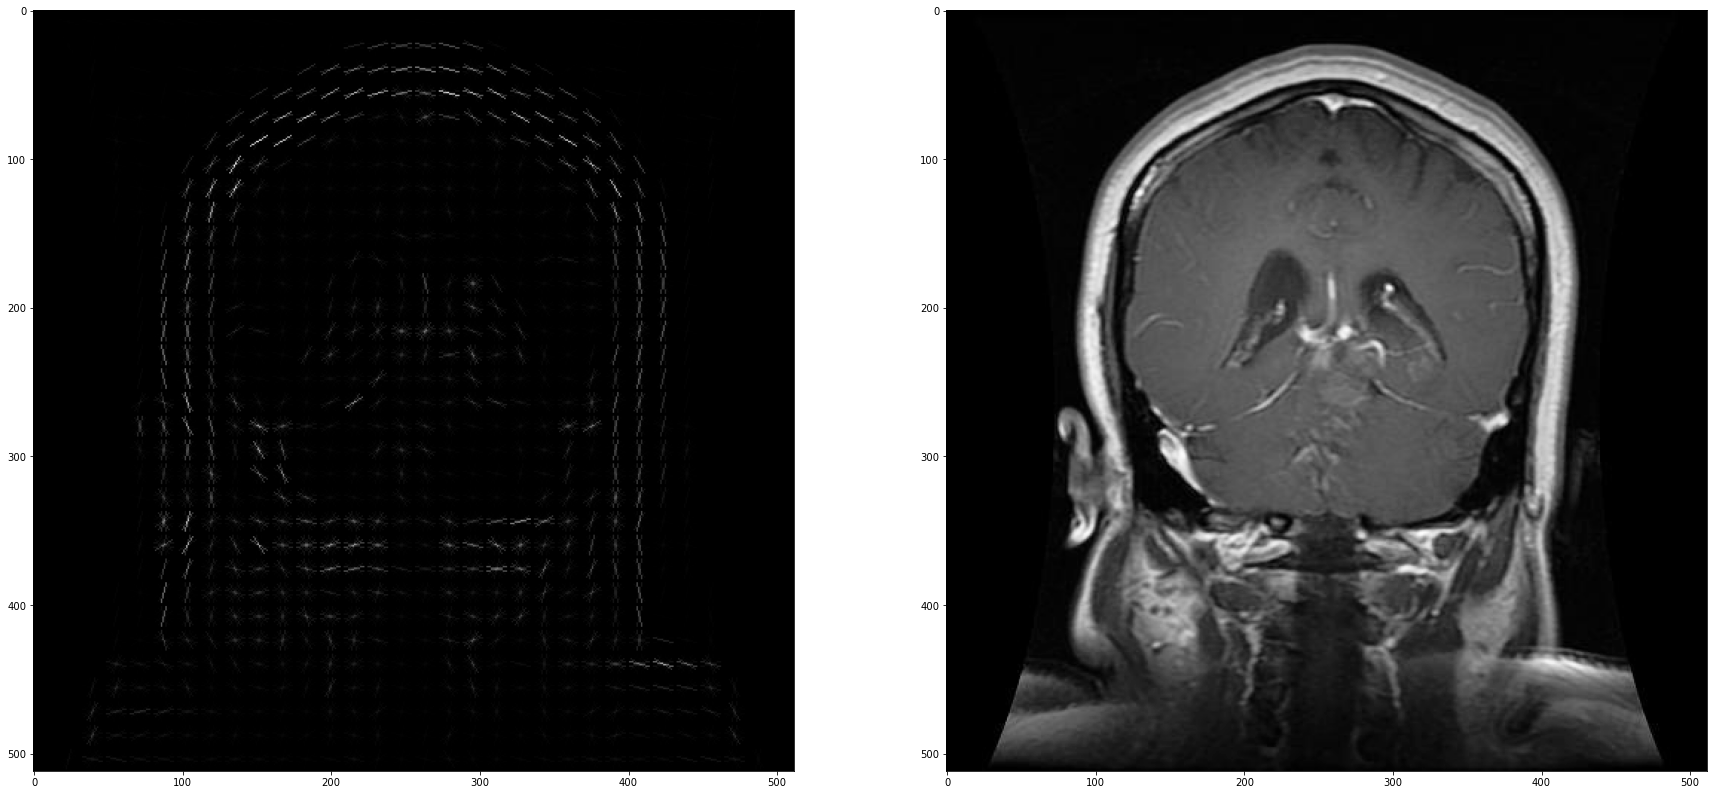

In [10]:
fig1, ax1 = plt.subplots(1,2, figsize=(30,30))
ax1[0].imshow(hog_images[1500], cmap=plt.cm.gray)
ax1[1].imshow(x[1500].reshape(512,512), cmap='Greys_r')


In [11]:
# Splitting the data into a train and validation set
xtrain2, xval2, ytrain2, yval2 = train_test_split(hog_features, y, train_size=0.85, random_state=15) 

In [12]:
# Creating an SVM algorithm using scikit learn
svc_classifier2 = SVC(kernel = 'linear')
# Alternatively since we are doing linear SVC, LinearSVC() function could also have been used
start_time = time.time()
svc_classifier2.fit(xtrain2, ytrain2)
classifier2_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier2_time))

Training time is: 5.928542375564575 seconds


In [13]:
# Predicting the outputs using SVM
y_pred_val2 = svc_classifier2.predict(xval2)
y_pred_train2 = svc_classifier2.predict(xtrain2)

The accuracy of the train set: 
1.0
The accuracy of the validation set: 
0.9733333333333334
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.90      0.92      0.91        65
       tumor       0.99      0.98      0.98       385

    accuracy                           0.97       450
   macro avg       0.94      0.95      0.95       450
weighted avg       0.97      0.97      0.97       450

The confusion matrix: 


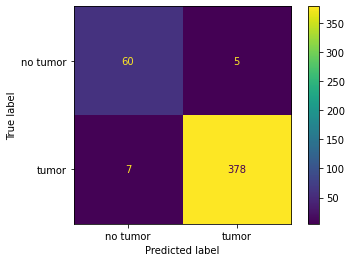

In [14]:
print('The accuracy of the train set: ')
print(accuracy_score(ytrain2, y_pred_train2))
print('The accuracy of the validation set: ')
print(accuracy_score(yval2, y_pred_val2))

print('The classification report: ')
print(classification_report(yval2, y_pred_val2, target_names=['no tumor', 'tumor']))

print('The confusion matrix: ')
conf_mat2 = confusion_matrix(yval2, y_pred_val2, labels=svc_classifier2.classes_)
cm_disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_mat2, display_labels=['no tumor', 'tumor'])
cm_disp2.plot()

# SVM with HOG and PCA

In [15]:
scaler1 = StandardScaler()
scaler1.fit(hog_features)
scaled_features = scaler1.transform(hog_features)

In [16]:
#pca1 = PCA(random_state=10, n_components=1000)
pca1 = PCA(.95)
pca1.fit(scaled_features)
scaled_features_pca = pca1.transform(scaled_features)

print('Number of Features: ')
print(pca1.n_components_)

Number of Features: 
1638


Text(0, 0.5, 'Cumulative Explained Variance')

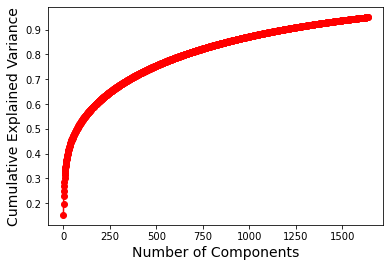

In [28]:
plt.figure()
plt.title('Cumulative Variance for PCA')
plt.plot(np.cumsum(pca1.explained_variance_ratio_), 'o-', color="r",)
plt.xlabel('Number of Components', fontsize = 14)
plt.ylabel('Cumulative Explained Variance', fontsize = 14)


In [17]:
# Splitting the data onto a test and a train set
xtrain3, xval3, ytrain3, yval3 = train_test_split(scaled_features_pca, y, train_size=0.85, random_state=15) 

In [18]:
# Creating an SVM algorithm using scikit learn
svc_classifier3 = SVC(kernel = 'linear')
# Alternatively since we are doing linear SVC, LinearSVC() function could also have been used
start_time = time.time()
svc_classifier3.fit(xtrain3, ytrain3)
classifier3_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier3_time))

Training time is: 1.1418192386627197 seconds


In [19]:
# Predicting the outputs using SVM
y_pred_val3 = svc_classifier3.predict(xval3)
y_pred_train3 = svc_classifier3.predict(xtrain3)

The accuracy of the train set: 
1.0
The accuracy of the validation set: 
0.9777777777777777
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.92      0.92      0.92        65
       tumor       0.99      0.99      0.99       385

    accuracy                           0.98       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.98      0.98      0.98       450

The confusion matrix: 


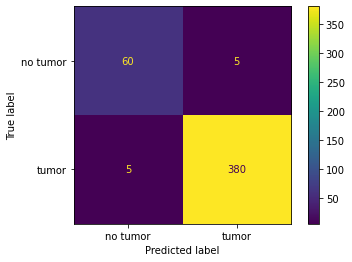

In [20]:
print('The accuracy of the train set: ')
print(accuracy_score(ytrain3, y_pred_train3))
print('The accuracy of the validation set: ')
print(accuracy_score(yval3, y_pred_val3))

print('The classification report: ')
print(classification_report(yval3, y_pred_val3, target_names=['no tumor', 'tumor']))

print('The confusion matrix: ')
conf_mat3 = confusion_matrix(yval3, y_pred_val3, labels=svc_classifier3.classes_)
cm_disp3 = ConfusionMatrixDisplay(confusion_matrix=conf_mat3, display_labels=['no tumor', 'tumor'])
cm_disp3.plot()

# SVM with HOG, PCA and Hyperparameter Tuning

In [21]:
xtrain4 = xtrain3
xval4 = xval3
ytrain4 = ytrain3
yval4 = yval3

In [22]:
svc_classifier4 = SVC()

# Tuning the hyperparameters using gridsearch 
param_grid = {'C': [0.1, 1, 10,  100], 'gamma': [0.00001, 0.001, 0.01],'kernel': ('rbf', 'poly', 'sigmoid','linear')}

In [23]:
grid = GridSearchCV(svc_classifier4, param_grid, refit=True, verbose=3, cv=5)
grid.fit(xtrain4, ytrain4)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.849 total time=   1.3s
[CV 2/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.847 total time=   1.3s
[CV 3/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.847 total time=   1.2s
[CV 4/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.847 total time=   1.2s
[CV 5/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.847 total time=   1.2s
[CV 1/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.849 total time=   0.8s
[CV 2/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.847 total time=   0.8s
[CV 3/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.847 total time=   0.8s
[CV 4/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.847 total time=   0.8s
[CV 5/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.847 total time=   0.8s
[CV 1/5] END C=0.1, gamma=1e-05, kernel=sigmoid;, score=0.849 total time=   1.0s
[CV 2/5] END C=0.1, gamma=1e-05, kernel=sigmoid

[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.912 total time=   3.5s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.912 total time=   3.3s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.902 total time=   3.3s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.912 total time=   3.5s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.941 total time=   2.5s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.927 total time=   2.5s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.947 total time=   2.5s
[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.959 total time=   2.5s
[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.949 total time=   2.6s
[CV 1/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.784 total time=   0.9s
[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.751 total time=   0.7s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.808 total time=   0.7s
[CV 4/5] END ...C=1, gamma=0

[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.906 total time=   3.2s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.912 total time=   3.2s
[CV 1/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.941 total time=   2.6s
[CV 2/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.927 total time=   2.7s
[CV 3/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.947 total time=   2.8s
[CV 4/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.959 total time=   2.7s
[CV 5/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.949 total time=   2.6s
[CV 1/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.808 total time=   0.7s
[CV 2/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.786 total time=   0.7s
[CV 3/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.798 total time=   0.7s
[CV 4/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.794 total time=   0.6s
[CV 5/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.792 total time=   0.7s
[CV 1/5] END .C=100, gamma=0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1e-05, 0.001, 0.01],
                         'kernel': ('rbf', 'poly', 'sigmoid', 'linear')},
             verbose=3)

In [24]:
print("Best hyperparameters are:",grid.best_params_)

Best hyperparameters are: {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}


In [25]:
svc_classifier4 = grid.best_estimator_

start_time = time.time()
svc_classifier4.fit(xtrain4, ytrain4)
classifier4_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier3_time))

# Predicting the outputs using SVM
y_pred_val4 = svc_classifier4.predict(xval4)
y_pred_train4 = svc_classifier4.predict(xtrain4)

Training time is: 1.1418192386627197 seconds


The accuracy of the train set: 
1.0
The accuracy of the validation set: 
0.9777777777777777
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.92      0.92      0.92        65
       tumor       0.99      0.99      0.99       385

    accuracy                           0.98       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.98      0.98      0.98       450

The confusion matrix: 


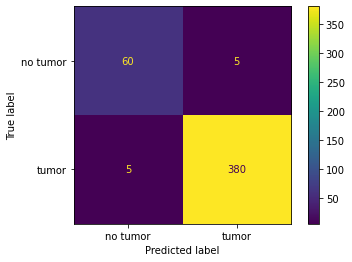

In [26]:
print('The accuracy of the train set: ')
print(accuracy_score(ytrain4, y_pred_train4))
print('The accuracy of the validation set: ')
print(accuracy_score(yval4, y_pred_val4))

print('The classification report: ')
print(classification_report(yval4, y_pred_val4, target_names=['no tumor', 'tumor']))

print('The confusion matrix: ')
conf_mat4 = confusion_matrix(yval3, y_pred_val4, labels=svc_classifier4.classes_)
cm_disp4 = ConfusionMatrixDisplay(confusion_matrix=conf_mat4, display_labels=['no tumor', 'tumor'])
cm_disp4.plot()

# Learning Curve

(0.0, 1.01)

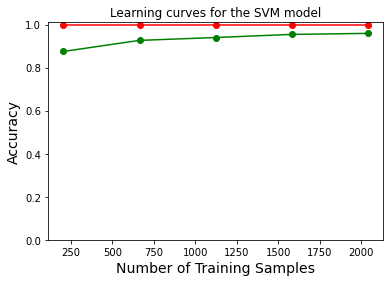

In [32]:
train_sizes4, train_scores4, validation_scores4, fit_times4, _ = learning_curve(svc_classifier4, xtrain4, y_pred_train4, cv=5,return_times=True)
plt.figure()
plt.title('Learning curves for the SVM model')
plt.plot(train_sizes4, np.mean(train_scores4, axis=1), 'o-', color="r", label = 'Training error')
plt.plot(train_sizes4, np.mean(validation_scores4, axis=1), 'o-', color="g", label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylim((0,1.01))

# Testing the Model with the Test Data

In [36]:
xdat2, ydat2 = da.labels_binary('./test')
x2 = np.array(xdat2)
y2 = np.array(ydat2)

# Normalizing the features
x2 = x2/255.

print(x2.shape)

(200, 512, 512, 1)


In [37]:
hog_features2 = []
hog_images2 = []
for datum in range(x2.shape[0]):
    fd, hog_image = hog(x[datum], orientations = 8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True)
    hog_features2.append(fd)
    hog_images2.append(hog_image)

In [38]:
hog_features2 = np.array(hog_features2)
hog_features2.shape

(200, 8192)

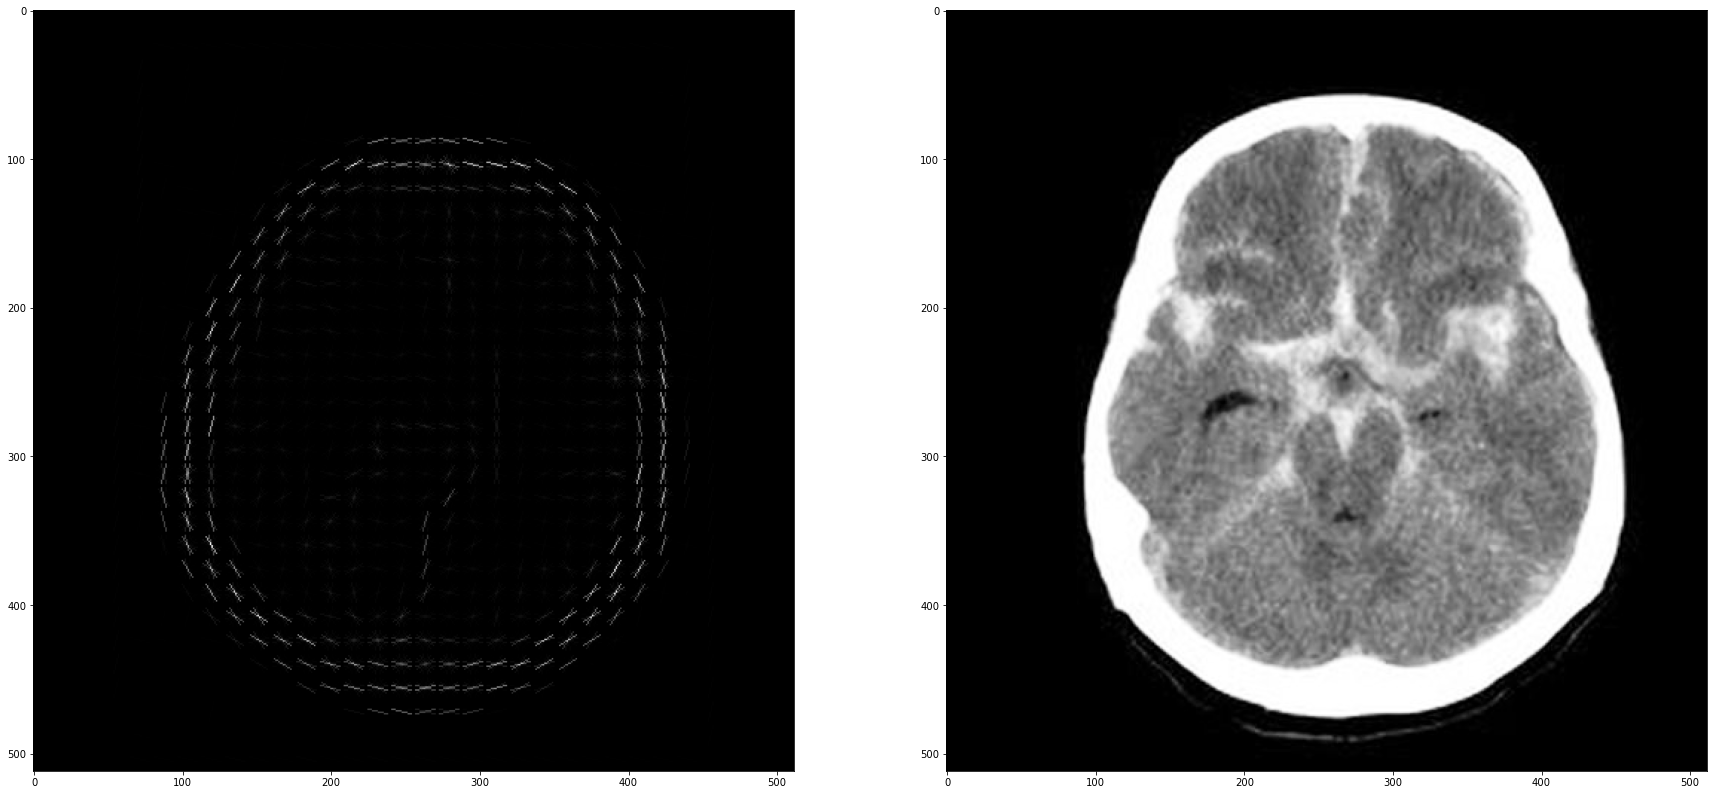

In [39]:
fig2, ax2 = plt.subplots(1,2, figsize=(30,30))
ax2[0].imshow(hog_images2[100], cmap=plt.cm.gray)
ax2[1].imshow(x2[100].reshape(512,512), cmap='Greys_r')


In [40]:
scaler2 = StandardScaler()
scaler2.fit(hog_features2)
scaled_features2 = scaler2.transform(hog_features2)
scaled_features2.shape

(200, 8192)

In [41]:
#pca1 = PCA(random_state=10, n_components=1000)
#pca2 = PCA(n_components=1638)
#pca2.fit(scaled_features2)
scaled_features_pca2 = pca1.transform(scaled_features2)

print('Number of Features: ')
print(scaled_features_pca2.shape)

Number of Features: 
(200, 1638)


In [42]:
# Predicting the outputs using SVM
y_pred_test5 = svc_classifier4.predict(scaled_features_pca2)

The accuracy of the test set: 
0.755
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.17      0.08      0.11        37
       tumor       0.81      0.91      0.86       163

    accuracy                           0.76       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.69      0.76      0.72       200

The confusion matrix: 


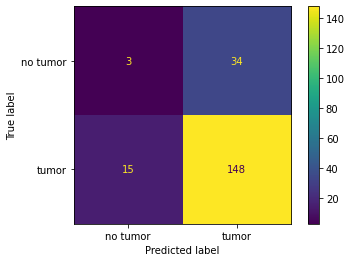

In [43]:
print('The accuracy of the test set: ')
print(accuracy_score(y2, y_pred_test5))

print('The classification report: ')
print(classification_report(y2, y_pred_test5, target_names=['no tumor', 'tumor']))

print('The confusion matrix: ')
conf_mat5 = confusion_matrix(y2, y_pred_test5, labels=svc_classifier4.classes_)
cm_disp5 = ConfusionMatrixDisplay(confusion_matrix=conf_mat5, display_labels=['no tumor', 'tumor'])
cm_disp5.plot()